<a href="https://colab.research.google.com/github/vitorlooo/ProjetoI-AnaliseDados/blob/main/AnaliseProjetoMusicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Análise de Dados**


# **Base 05 - Músicas Mais Tocadas**

**Descrição geral:**
Base com dados sobre as músicas mais populares em 2024, abrangendo plataformas como Spotify, YouTube, TikTok, entre outras.

**Desafios de análise:**
- Identificar padrões musicais que impulsionam popularidade.
- Avaliar impacto de diferentes mídias sociais na divulgação de músicas.
- Analisar métricas de engajamento ao longo do tempo.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/05musicas.csv", sep=',', encoding='latin1')


Mounted at /content/drive


# **1. Análise Inicial da Base: Músicas Mais Tocadas**


# 1.1 Descrição:

**Tema:**
A base trata das músicas mais populares em 2024, reunindo dados de desempenho e engajamento em diversas plataformas de streaming e redes sociais, como Spotify, YouTube, TikTok, Apple Music, Deezer, entre outras.


**Número de Registros:**

A base contém 4.600 músicas, cada uma representando um único registro (linha).


**Número de Variáveis:**

A base possui 29 variáveis, que abrangem:

- Informações gerais sobre a música (nome, artista, data de lançamento, código ISRC, classificação histórica).

- Métricas de popularidade e engajamento em plataformas digitais (streams, curtidas, visualizações, presença em playlists, etc.).

- Indicadores de performance em rádios, reconhecimento por aplicativos como Shazam e SoundCloud.

- Informações sobre se a faixa possui conteúdo explícito.



**Contexto Empresarial:**

Esta base pode ser extremamente útil para gravadoras, plataformas de streaming, agências de marketing musical e artistas, pois permite:

- Identificar padrões que impulsionam o sucesso de uma faixa.

- Avaliar o impacto das redes sociais na popularidade das músicas.

- Apoiar decisões estratégicas de divulgação e investimento com base em dados reais de engajamento.

### Dicionário de Variáveis

| Variável                     | Descrição                                               |
|-----------------------------|----------------------------------------------------------|
| Track                       | Nome da música                                           |
| Album Name                  | Nome do álbum                                            |
| Artist                      | Nome do artista                                          |
| Release Date                | Data de lançamento                                       |
| ISRC                        | Código internacional da faixa                           |
| All Time Rank               | Posição da música no ranking histórico                   |
| Track Score                 | Nota da faixa (score)                                    |
| Spotify Streams             | Número de execuções no Spotify                          |
| Spotify Playlist Count      | Quantidade de playlists do Spotify                      |
| Spotify Playlist Reach      | Alcance das playlists do Spotify                        |
| Spotify Popularity          | Popularidade da música no Spotify                       |
| YouTube Views               | Visualizações no YouTube                                |
| YouTube Likes               | Curtidas no YouTube                                     |
| TikTok Posts                | Número de posts no TikTok                               |
| TikTok Likes                | Curtidas no TikTok                                      |
| TikTok Views                | Visualizações no TikTok                                 |
| YouTube Playlist Reach      | Alcance das playlists no YouTube                        |
| Apple Music Playlist Count  | Quantidade de playlists na Apple Music                  |
| AirPlay Spins               | Execuções em rádios AirPlay                             |
| SiriusXM Spins              | Execuções na SiriusXM                                   |
| Deezer Playlist Count       | Quantidade de playlists no Deezer                       |
| Deezer Playlist Reach       | Alcance das playlists no Deezer                         |
| Amazon Playlist Count       | Quantidade de playlists na Amazon Music                 |
| Pandora Streams             | Execuções na Pandora                                    |
| Pandora Track Stations      | Número de estações da Pandora com a faixa               |
| Soundcloud Streams          | Execuções no SoundCloud                                 |
| Shazam Counts               | Quantidade de identificações via Shazam                 |
| TIDAL Popularity            | Popularidade no TIDAL                                   |
| Explicit Track              | Contém conteúdo explícito (Sim/Não)                     |


In [42]:
pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x).replace(',', '.'))

df.head(30)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725,390.470.936,30.716,196.631.588,92,84.274.754,1.713.126,5.767.700,651.565.900,5.332.281.936,150.597.040,210,40.975,684,62,17.598.718,114,18.004.655,22.931,4.818.457,2.669.262,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,546,323.703.884,28.113,174.597.137,92,116.347.040,3.486.739,674.700,35.223.547,208.339.025,156.380.351,188,40.778,3,67,10.422.430,111,7.780.028,28.444,6.623.075,1.118.279,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538,601.309.283,54.331,211.607.669,92,122.599.116,2.228.730,3.025.400,275.154.237,3.369.120.610,373.784.955,190,74.333,536,136,36.321.847,172,5.022.621,5.639,7.208.651,5.285.340,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,445,2.031.280.633,269.802,136.569.078,85,1.096.100.899,10.629.796,7.189.811,1.078.757.968,14.603.725.994,3.351.188.582,394,1.474.799,2.182,264,24.684.248,210,190.260.277,203.384,3.265.268,11.822.942,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423,107.034.922,7.223,151.469.874,88,77.373.957,3.670.188,16.400,26.576.922,266.064.027,112.763.851,182,12.185,1,82,17.660.624,105,4.493.884,7.006,207.179,457.017,1
5,Lovin On Me,Lovin On Me,Jack Harlow,2023-11-10,USAT22311371,6,410,670.665.438,105.892,175.421.034,83,131.148.091,1.392.593,4.202.367,214.943.489,2.938.686.633,2.867.222.632,138,522.042,4.654,86,17.167.254,152,138.529.362,50.982,9.438.601,4.517.131,1
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,USWB12307016,7,407,900.158.751,73.118,201.585.714,86,308.723.145,4.120.760,182.529,29.584.940,534.915.313,4.601.579.812,280,383.478,429,168,48.197.850,154,65.447.476,57.372,3.265.268,9.990.302,0
7,Gata Only,Gata Only,FloyyMenor,2024-02-02,QZL382406049,8,376,675.079.153,40.094,211.236.940,92,228.382.568,1.439.495,3.500.000,338.546.668,3.804.584.163,2.112.581.620,160,17.221,30,87,33.245.595,53,3.372.428,5.762,3.265.268,6.063.523,1
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,2024-06-09,TCJPA2463708,9,356,1.653.018.119,1,15,67,148.269.610,1.257.935,182.529,26.576.922,266.064.027,97.746.040,28,5.954,86,15,237.407,17,12.735.768,7.818,3.265.268,854.584,1
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,2024-05-23,USSM12404354,10,331,90.676.573,10.400,184.199.419,86,32.735.244,988.682,325.800,121.574.500,974.656.200,174.706.874,191,3.823,117,78,10.800.098,92,1.005.626,842,3.679.709,666.302,1


# 1.2 Apresente uma tabela com a quantidade de dados nulos em cada variável

In [5]:
# A função 'df.isnull' é utilizada para identificar presença de dados nulos em um dataframe

tabela_nulos = df.isnull().sum().reset_index()

# Renomear nome das colunas no dataframe

tabela_nulos.columns = ['Variável', 'Qtd_Nulos']

# Exibir a tabela ordenada pela quantidade de nulos
tabela_nulos = tabela_nulos.sort_values(by='Qtd_Nulos', ascending=False)

# Mostrar a tabela
print(tabela_nulos)

                      Variável  Qtd_Nulos
27            TIDAL Popularity       4600
25          Soundcloud Streams       3333
19              SiriusXM Spins       2123
24      Pandora Track Stations       1268
13                TikTok Posts       1173
23             Pandora Streams       1106
22       Amazon Playlist Count       1055
16      YouTube Playlist Reach       1009
15                TikTok Views        981
14                TikTok Likes        980
21       Deezer Playlist Reach        928
20       Deezer Playlist Count        921
10          Spotify Popularity        804
26               Shazam Counts        577
17  Apple Music Playlist Count        561
18               AirPlay Spins        498
12               YouTube Likes        315
11               YouTube Views        308
7              Spotify Streams        113
9       Spotify Playlist Reach         72
8       Spotify Playlist Count         70
2                       Artist          5
5                All Time Rank    

# 1.3 Limpeza dos dados


In [6]:
# Remoção de uma coluna 100% nulas, sem informações útils
df.drop(columns=['TIDAL Popularity'], inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [8]:
# O método '.filna' serve para substituir valores nulos ou ausentes em um DataFrame

df['Artist'] = df['Artist'].fillna('Desconhecido')

In [9]:
# 'pd.to_datetime' é uma função da biblioteca Pandas em Python que converte um tipo de valor para o tipo de dado 'datetime'

df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

In [10]:
# 'df.drop_duplicates(inplace=True)'é uma função que remove linhas duplicadas de um DataFrame

linhas_antes = df.shape[0]
df.drop_duplicates(inplace=True)
linhas_removidas = linhas_antes - df.shape[0]

if linhas_removidas > 0:
    print(f"{linhas_removidas} linhas duplicadas foram removidas.")
else:
    print("Nenhuma linha duplicada foi encontrada ou removida.")

2 linhas duplicadas foram removidas.


In [11]:
# Lista de colunas que precisam ser convertidas para numérico
cols_to_convert_to_numeric = [
    'All Time Rank',
    'Spotify Streams',
    'Spotify Playlist Count',
    'Spotify Playlist Reach',
    'YouTube Views',
    'YouTube Likes',
    'TikTok Posts',
    'TikTok Likes',
    'TikTok Views',
    'YouTube Playlist Reach',
    'SiriusXM Spins',
    'AirPlay Spins',
    'Deezer Playlist Reach',
    'Amazon Playlist Count',
    'Pandora Streams',
    'Pandora Track Stations',
    'Shazam Counts',
    'Soundcloud Streams'
]

for col in cols_to_convert_to_numeric:
    df[col] = df[col].astype(str).str.replace('∅', '', regex=False).str.replace(',', '', regex=False).str.strip()

    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4598 non-null   object        
 1   Album Name                  4598 non-null   object        
 2   Artist                      4598 non-null   object        
 3   Release Date                4598 non-null   datetime64[ns]
 4   ISRC                        4598 non-null   object        
 5   All Time Rank               4598 non-null   int64         
 6   Track Score                 4598 non-null   float64       
 7   Spotify Streams             4485 non-null   float64       
 8   Spotify Playlist Count      4528 non-null   float64       
 9   Spotify Playlist Reach      4526 non-null   float64       
 10  Spotify Popularity          3794 non-null   float64       
 11  YouTube Views               4290 non-null   float64       
 1

In [13]:
# Verifica se há algum valor faltando. Se encontrar valores ausentes, preenche com a mediana da coluna

colunas_para_mediana = [
    'Soundcloud Streams', 'SiriusXM Spins', 'Pandora Track Stations',
    'TikTok Posts', 'Pandora Streams', 'Amazon Playlist Count',
    'YouTube Playlist Reach', 'TikTok Views', 'TikTok Likes',
    'Deezer Playlist Reach', 'Deezer Playlist Count',
    'Spotify Popularity', 'Shazam Counts', 'Apple Music Playlist Count',
    'AirPlay Spins', 'YouTube Likes', 'YouTube Views',
    'Spotify Streams', 'Spotify Playlist Reach', 'Spotify Playlist Count'
]

for col in colunas_para_mediana:
    if col in df.columns and df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

<ipython-input-13-2649392974>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4598 non-null   object        
 1   Album Name                  4598 non-null   object        
 2   Artist                      4598 non-null   object        
 3   Release Date                4598 non-null   datetime64[ns]
 4   ISRC                        4598 non-null   object        
 5   All Time Rank               4598 non-null   int64         
 6   Track Score                 4598 non-null   float64       
 7   Spotify Streams             4598 non-null   float64       
 8   Spotify Playlist Count      4598 non-null   float64       
 9   Spotify Playlist Reach      4598 non-null   float64       
 10  Spotify Popularity          4598 non-null   float64       
 11  YouTube Views               4598 non-null   float64       
 1

# **2. Análise Estática**

# 2.1 Distribuição das variáveis com histogramas e boxplots:




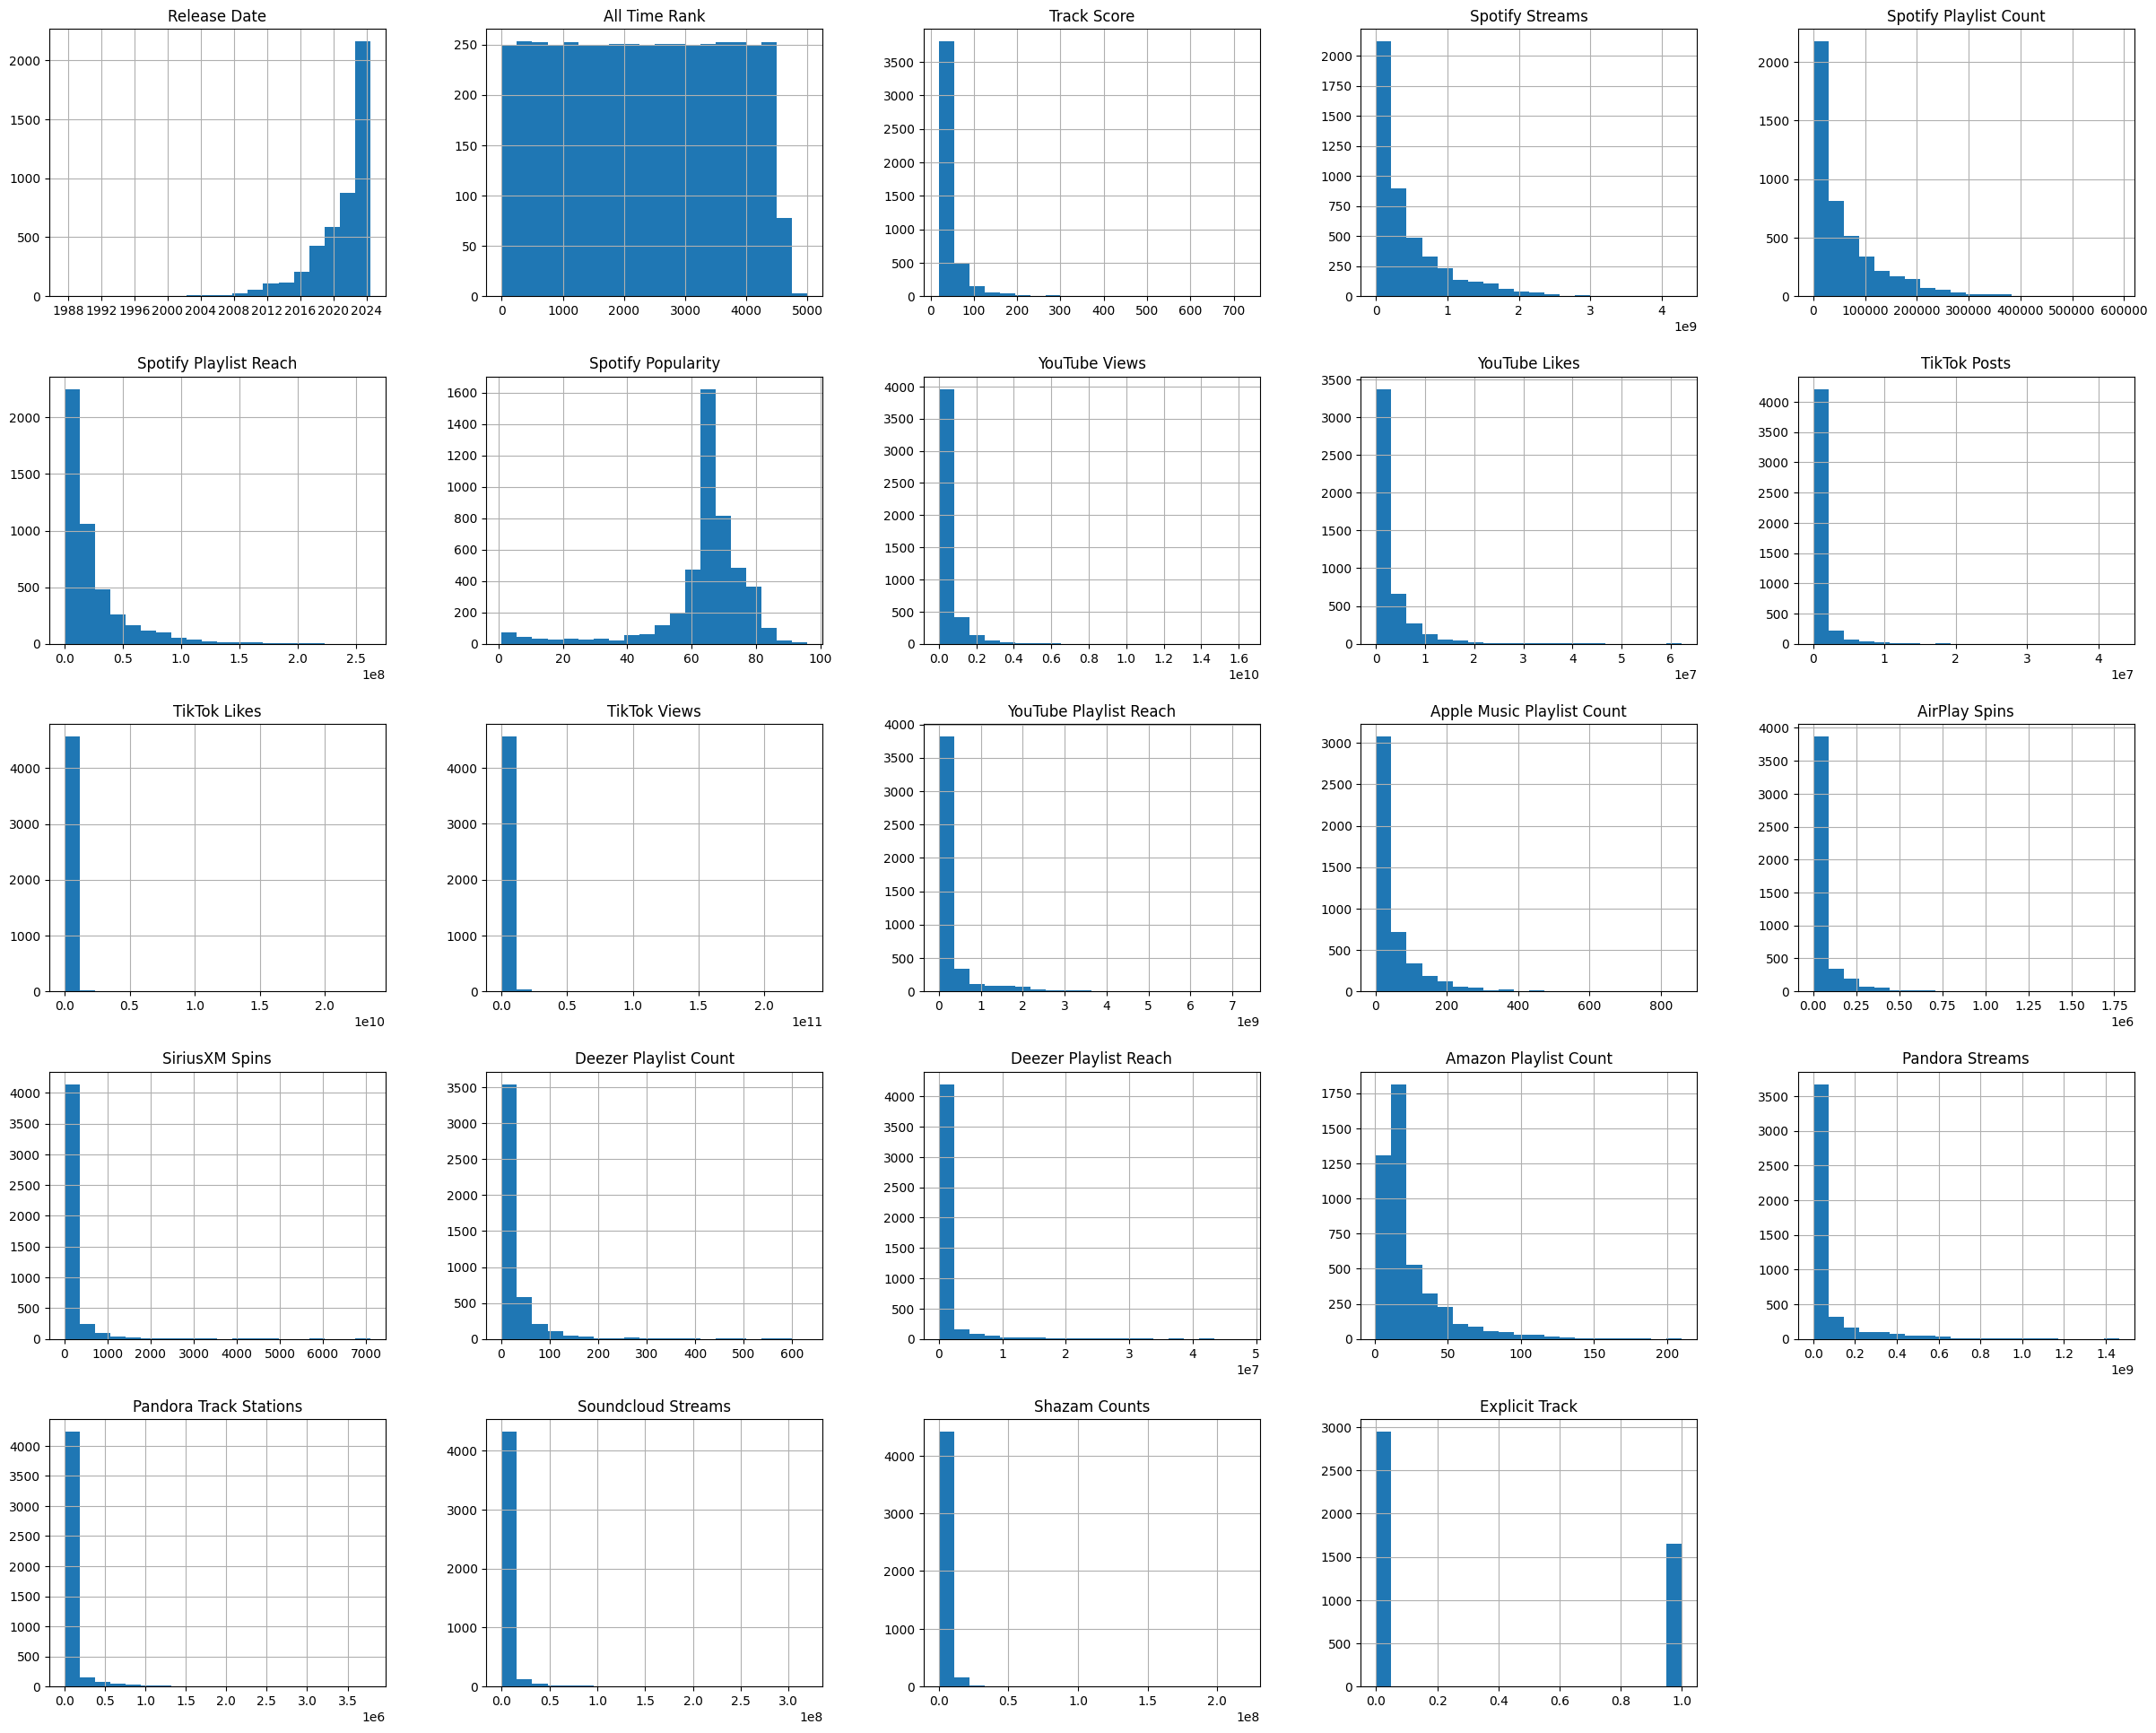

In [15]:
# 'df.hist' é um método usado para criar histogramas

df.hist(bins=20, figsize=(30,24));

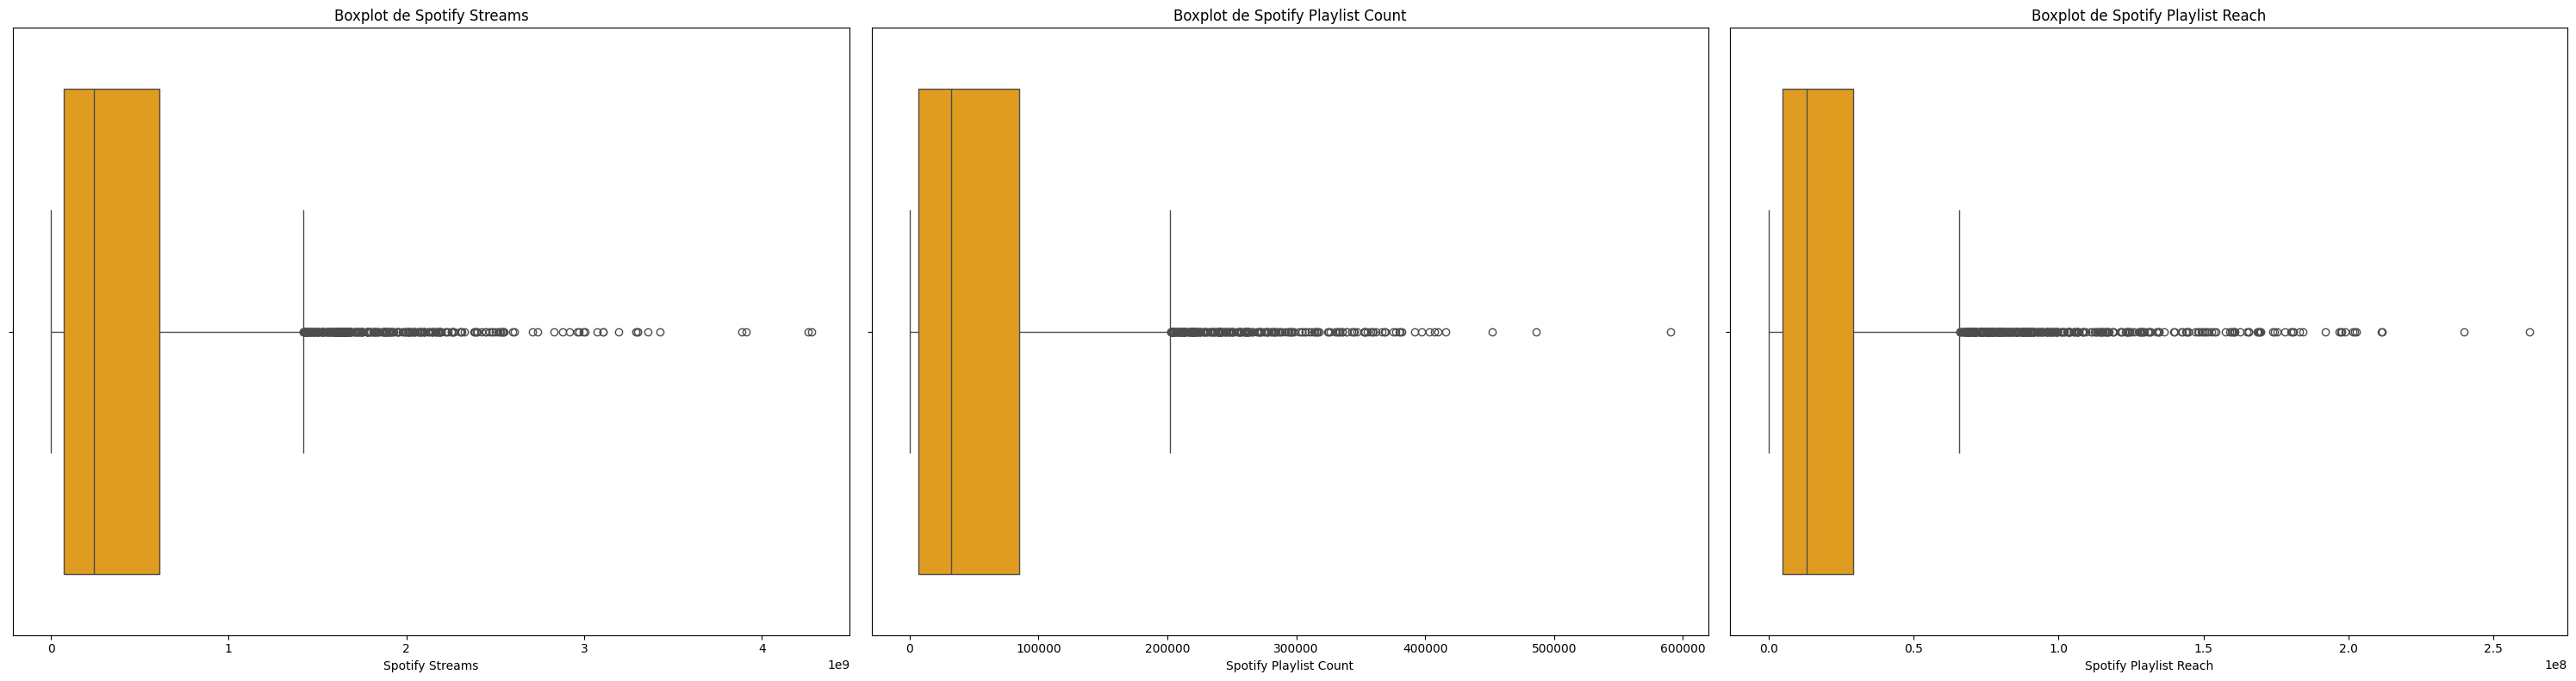

In [16]:
spotify_metrics = ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach']

plt.figure(figsize=(30, 8))
for i, col in enumerate(spotify_metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [51]:
pd.set_option('display.max_columns', None) #Controla o número máximo de colunas

pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x).replace(',', '.')) #Separa os números corretamente tirando as notações científicas

df.sort_values(by='Spotify Streams', ascending=False).head(10) #Organiza conforme os valores

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
55,Blinding Lights,Blinding Lights,The Weeknd,2019-11-29,USUG11904206,56,194,4.281.468.720,590.392,165.544.011,83,833.807.130,10.093.211,2.882.064,337.322.563,3.501.177.394,2.258.085.924,859,1.695.240,1.116,564,11.701.129,184,489.299.762,319.634,28.659.471,28.994.660,0
4254,Blinding Lights,Blinding Lights,xSyborg,2021-03-13,QZLBC2302779,4229,20,4.261.328.190,32.312,13.264.112,67,148.269.610,1.257.935,182.529,26.576.922,266.064.027,97.746.040,28,5.954,86,15,237.407,17,12.735.768,7.818,3.265.268,854.584,0
53,Shape of You,Shape of You,Ed Sheeran,2017-01-06,GBAHS1600463,54,195,3.909.458.734,316.378,148.037.882,80,8.013.997.219,45.770.887,2.270.315,194.420.058,2.320.856.331,2.294.804.623,465,402.829,282,512,2.710.931,115,733.565.655,651.557,78.149.375,1.146.246,0
1637,Shape of You,Shape of You,xSyborg,2021-02-20,QZLBC2302789,1807,36,3.888.356.417,32.312,13.264.112,67,148.269.610,1.257.935,182.529,26.576.922,266.064.027,97.746.040,28,5.954,86,15,237.407,17,12.735.768,7.818,3.265.268,854.584,0
132,Someone You Loved,Breach,Lewis Capaldi,2018-11-08,DEUM71807062,133,130,3.427.498.835,338.763,160.553.919,82,2.153.701.892,20.891.433,1.940.473,212.007.614,2.161.032.034,2.333.853.734,408,600.211,381,502,4.834.088,110,427.212.257,357.540,3.265.268,29.266.297,0
114,Sunflower - Spider-Man: Into the Spider-Verse,Sunflower (Spider-Man: Into the Spider-Verse),Post Malone,2018-10-18,USUM71814888,116,144,3.358.704.125,392.082,123.917.182,79,2.763.188.773,19.410.390,2.714.134,178.829.434,1.597.453.878,484.189.798,351,273.683,86,86,809.352,99,546.367.356,906.813,3.265.268,1.569.935,0
19,As It Was,As It Was,Harry Styles,2022-03-31,USSM12200612,20,292,3.301.814.535,407.119,169.783.402,87,800.899.315,9.101.589,2.755.903,1.633.970.617,15.405.881.843,7.289.707.052,455,1.777.811,4.909,330,12.907.852,189,132.624.772,79.909,3.265.268,14.967.379,0
3406,As It Was,As It Was (Official Video),Harry Styles,2022-03-31,USSM22200594,3410,24,3.299.082.422,1,1,67,148.269.610,1.257.935,182.529,26.576.922,266.064.027,97.746.040,28,5.954,86,15,237.407,17,12.735.768,7.818,3.265.268,854.584,0
262,Starboy,Starboy,The Weeknd,2016-09-22,USUG11600976,265,96,3.291.262.413,366.133,98.022.646,84,2.829.990.867,14.968.547,262.780,52.707.882,375.498.232,218.584.786,341,68.441,148,118,875.683,67,331.295.154,418.888,23.612.071,15.648.166,1
519,One Dance,One Dance (feat. Wizkid & Kyla) - Single,Drake,2016-04-04,USCM51600028,518,68,3.192.204.066,379.853,131.832.723,82,456.806.913,5.068.762,2.381.341,51.227.212,388.544.079,6.670.180,550,184.311,932,165,1.383.884,97,714.508.129,601.041,3.265.268,21.316.589,0


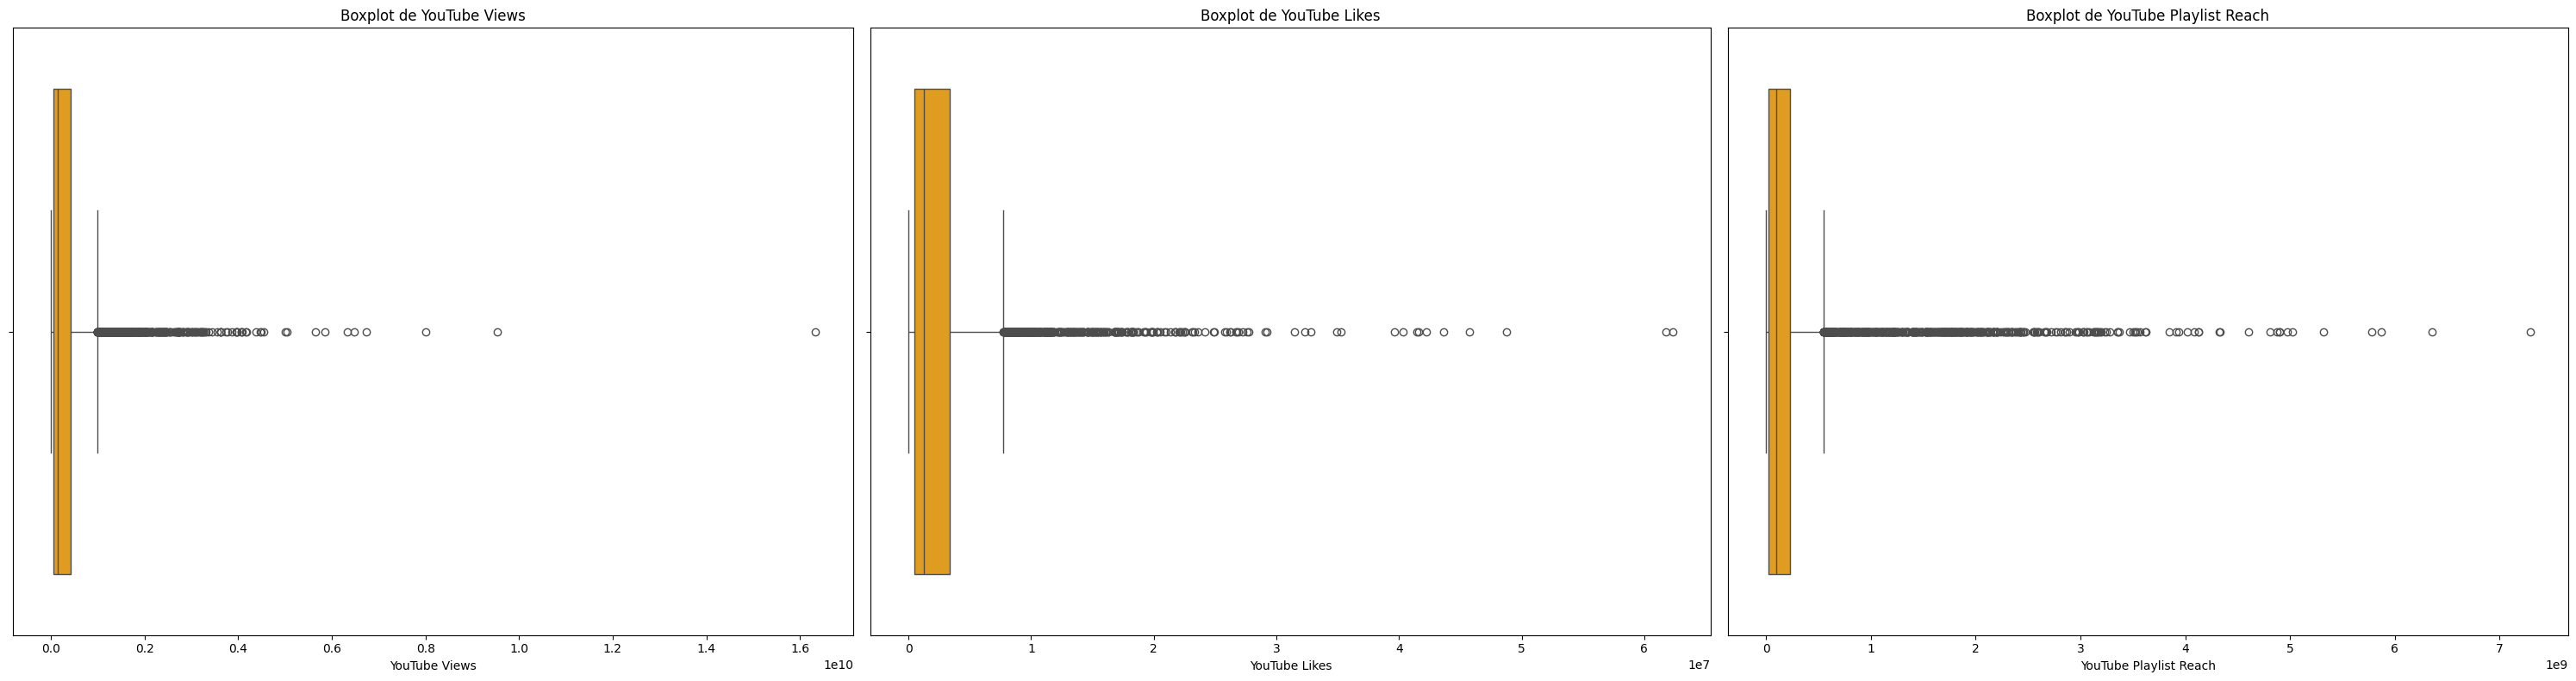

In [18]:
youtube_metrics = ['YouTube Views', 'YouTube Likes', 'YouTube Playlist Reach']

plt.figure(figsize=(30, 8))
for i, col in enumerate(youtube_metrics, 1):
    plt.subplot(1, 3 , i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [19]:
pd.set_option('display.max_columns', None) #Controla o número máximo de colunas

pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x).replace(',', '.')) #Separa os números corretamente tirando as notações científicas


df.sort_values(by='YouTube Views', ascending=False).head(10) #Organiza conforme os valores

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
27,Baby Shark,ýýýýýýýýý ýýýýýý ýýýýýýýýýýýý,Pinkfong,2015-12-01,KRE671700001,28,266,720.822.868,60.945,7.530.769,71,16.322.756.555,48.757.673,7.743.800,281.762.094,6.577.639.193,2.166.611,33,284,142,19,52.179,17,86.458.847,2.234.137,3.265.268,2.064.420,0
49,Despacito,Despacito (Featuring Daddy Yankee),Luis Fonsi,2017-01-13,USUM71607007,50,204,1.747.093.405,178.114,49.464.650,74,9.537.135.721,61.799.279,799.338,78.304.409,1.143.297.071,569.548.901,179,121.234,116,145,1.977.014,118,266.603.596,2.359.900,3.265.268,19.622.551,0
53,Shape of You,Shape of You,Ed Sheeran,2017-01-06,GBAHS1600463,54,195,3.909.458.734,316.378,148.037.882,80,8.013.997.219,45.770.887,2.270.315,194.420.058,2.320.856.331,2.294.804.623,465,402.829,282,512,2.710.931,115,733.565.655,651.557,78.149.375,1.146.246,0
14,bathroom floor,bathroom floor,Kids With Buns,2022-10-07,NLC242100307,15,302,297.185,277,24.445,12,6.736.502.312,16.785.489,3,1.088,22.234,97.746.040,1,1.057,86,15,237.407,17,12.735.768,7.818,3.265.268,3.288,0
80,Perfect,ýý (Deluxe),Ed Sheeran,2017-03-03,GBAHS1700024,81,168,2.969.999.682,280.165,116.921.604,81,6.473.698.897,39.632.673,6.642.975,601.244.764,7.647.479.866,1.708.317.539,208,263.386,129,343,1.242.581,102,617.483.078,595.052,3.265.268,854.584,0
250,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),Wiz Khalifa,2015-01-01,USAT21703595,251,98,1.891.920.348,159.571,73.641.738,78,6.335.989.683,43.663.933,2.196.129,424.216.963,3.455.170.110,602.157.439,137,5.954,5,8,16.367,6,12.735.768,7.818,3.265.268,22.021.769,0
649,Gangnam Style (ï¿½ï¿½ï¿½ï¿½ï¿½ï,Hits For Kids 29,PSY,2012-01-01,USUM71210283,647,60,477.162.323,103.211,28.183.533,67,5.849.588.091,31.460.015,146.609,64.279.161,578.660.460,288.553.687,93,13.151,77,50,208.246,21,12.735.768,7.818,3.265.268,7.977.546,0
253,Uptown Funk,Full Circle: The Live Anthology,Mark Ronson,2011-11-20,GBARL1401524,254,97,1.993.030.264,256.764,149.909.699,77,5.644.117.304,24.960.395,274.381,98.429.039,1.268.235.679,1.997.821.697,507,160.982,366,308,2.956.482,137,994.708.599,2.280.901,3.265.268,23.508.115,1
1136,Axel F,Best of Crazy Hits,Crazy Frog,2009-12-11,DEAF71578230,1134,45,178.536.020,870,142.649,30,5.049.428.366,20.305.999,182.529,26.576.922,266.064.027,204.191.511,1,5.954,86,15,237.407,17,12.735.768,7.818,3.265.268,2.967.336,0
291,Dame Tu Cosita,Dame Tu Cosita,El Chombo,2018-04-23,TCADP1859309,291,90,239.850.720,273,54.198,67,5.004.189.392,20.218.394,182.529,26.576.922,266.064.027,229.315.984,28,5.954,86,15,237.407,17,12.735.768,7.818,3.265.268,854.584,0


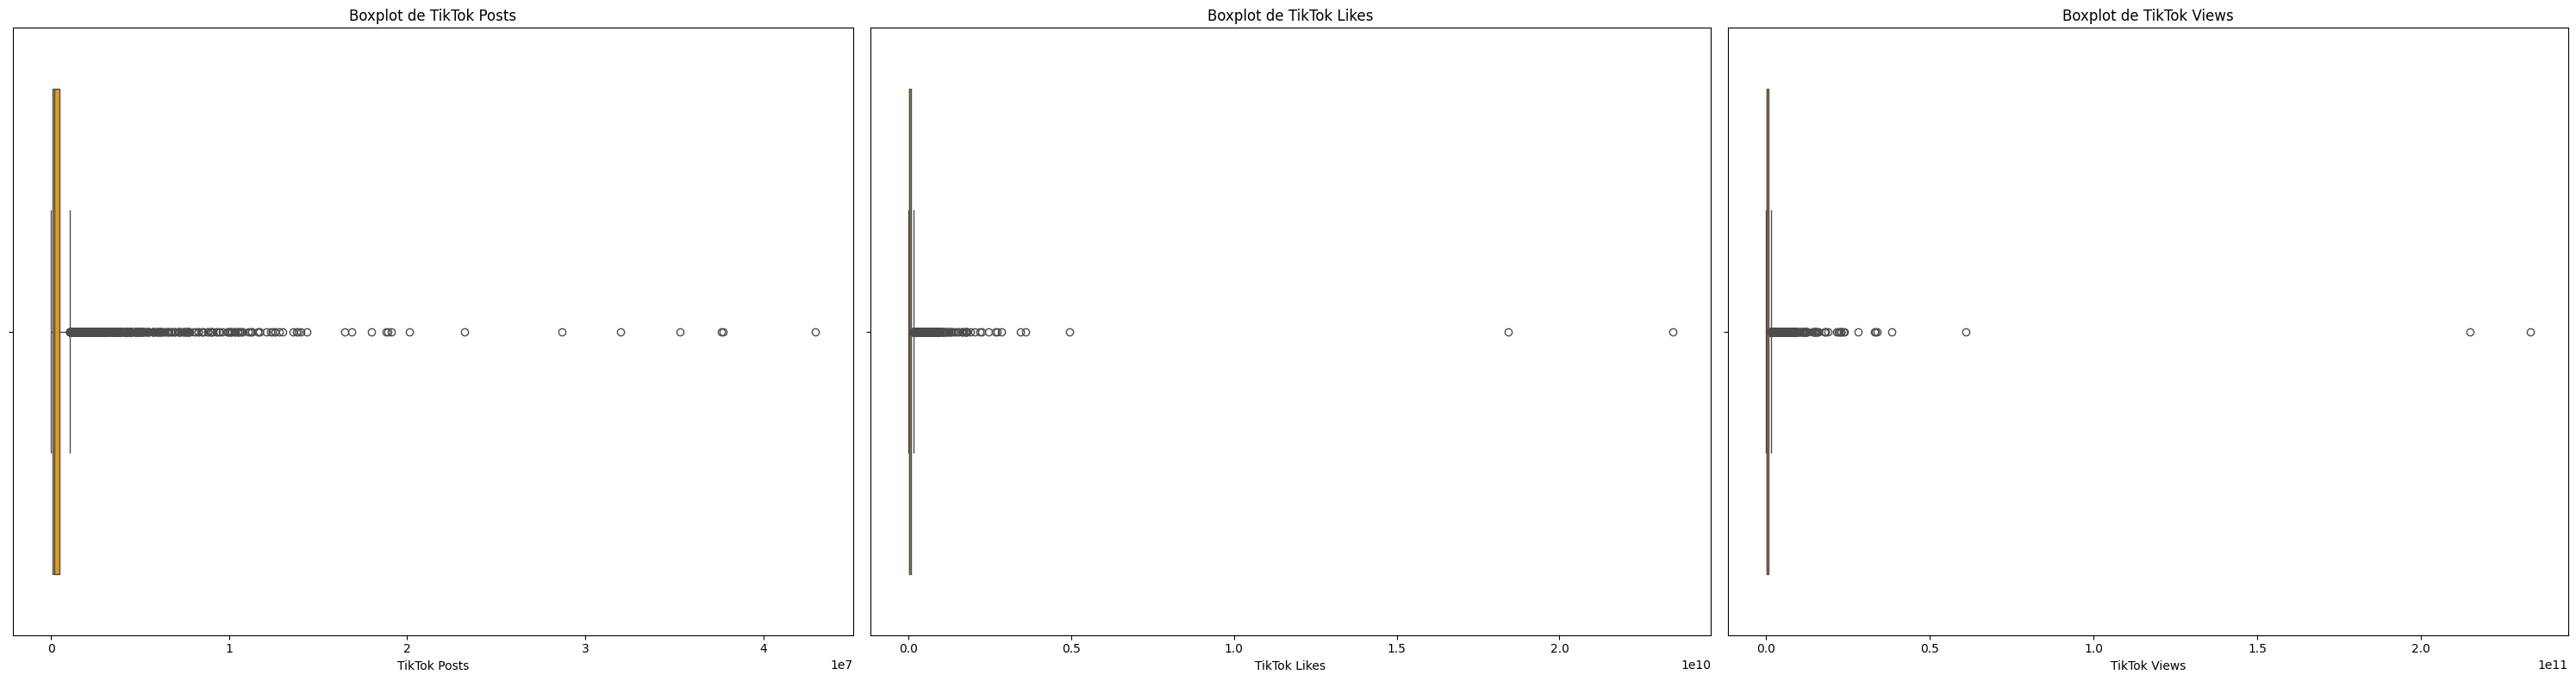

In [20]:
tiktok_metrics = ['TikTok Posts', 'TikTok Likes', 'TikTok Views']

plt.figure(figsize=(30, 8))
for i, col in enumerate(tiktok_metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [44]:
pd.set_option('display.max_columns', None) #Controla o número máximo de colunas

pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x).replace(',', '.')) #Separa os números corretamente tirando as notações científicas


df.sort_values(by='TikTok Posts', ascending=False).head(10) #Organiza conforme os valores

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
76,Laxed ï¿½ï¿½ï¿½ Sire,Laxed (Siren Beat),Jawsh 685,2020-04-24,NZAM02001128,77,169,239.850.720,10.230,1.142.937,67,12.489.728,339.414,42.900.000,919.945.708,12.221.514.692,97.746.040,28,5.954,86,15,237.407,17,5.678.792,7.818,3.265.268,854.584,0
103,Laxed (Siren Beat),Laxed (Siren Beat),Jawsh 685,2020-04-24,USSM12002399,104,150,61.382.407,7.240,1.708.319,43,9.977.490,201.210,37.726.462,9.239.474,147.837.262,97.746.040,15,10.152,86,5,59.317,1,12.735.768,7.818,3.265.268,3.819.161,0
25,Beat Automotivo Tan Tan Tan Viral,Beat Automotivo Tan Tan Tan Viral,WZ Beat,2022-05-24,BXWEH2200054,26,268,7.382.759,3.504,661.084,35,4.233.958,69.990,37.621.885,1.636.811.753,22.918.660.728,97.746.040,1,5.954,439,1,6,1,12.735.768,7.818,3.265.268,633.525,0
1922,Love You So,The King Khan & BBQ Show,The King Khan & BBQ Show,2005-01-01,USA3D0700101,1918,33,16.326.628,12.434,3.542.140,44,7.603.329,122.780,35.323.801,18.422.696.340,214.843.956.590,13.579.446,9,215,17,12,211.251,12,107.438,7.818,3.265.268,632.600,0
1024,Monkeys Spinning Monkeys,SteamFun - Single,Kevin MacLeod,2011-05-16,USUAN1400011,1018,48,11.477.477,7.679,1.490.705,36,11.457.166,123.604,31.963.934,23.474.223.833,233.232.311.463,1.418.397,4,2.557,86,1,43.207,1,12.735.768,7.818,3.265.268,1.177.639,0
411,Relationship (feat. Future),Beautiful Thugger Girls,Young Thug,2017-06-16,USAT21701747,410,76,458.957.128,89.812,13.215.590,61,47.166.510,482.132,28.665.700,112.444.345,1.069.735.982,9.528.686,1,135,12,1,57,17,12.735.768,7.818,3.265.268,854.584,1
341,Banana (feat. Shaggy),Banana (feat. Shaggy),Conkarah,2019-08-16,QMRSZ1901446,341,83,27.747.363,9.067,1.365.840,41,136.028.794,1.352.520,23.206.073,803.136.063,11.797.196.743,11.609.501,12,7.746,100,8,90.628,10,12.735.768,7.818,3.265.268,348.103,0
113,Aesthetic,Aesthetic,Tollan Kim,2022-03-04,SGB502208576,114,144,5.712.985,2.311,535.908,44,3.120.073,56.276,20.114.495,2.452.502.310,33.870.791.454,97.746.040,4,22,86,4,1.397,1,21.564,81,3.265.268,249.823,0
460,ýýýýýýýýýý ýýýýýýýýýýýý,ýýýýýýýýýý ýýýýýýýýýýýý,ALEX&RUS,2019-07-03,QM6N21999015,460,72,52.830.200,14.893,1.344.212,41,263.688.786,1.760.965,19.100.000,295.333.807,5.821.447.553,97.746.040,2,430,86,15,237.407,17,12.735.768,7.818,3.265.268,3.415.809,0
2107,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-01-01,USSM19400325,2097,32,1.810.649.765,109.411,45.003.974,60,824.500.156,7.455.155,18.894.720,1.432.227.925,15.963.128.797,29.891.688,418,131.873,139,143,1.390.899,125,304.497.253,3.556.791,1.273.462,6.531.412,0


In [22]:
# Exemplo para identificar outliers
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f'{col}: {len(outliers)} outliers')

All Time Rank: 0 outliers
Track Score: 402 outliers
Spotify Streams: 320 outliers
Spotify Playlist Count: 244 outliers
Spotify Playlist Reach: 379 outliers
Spotify Popularity: 454 outliers
YouTube Views: 505 outliers
YouTube Likes: 411 outliers
TikTok Posts: 705 outliers
TikTok Likes: 598 outliers
TikTok Views: 624 outliers
YouTube Playlist Reach: 564 outliers
Apple Music Playlist Count: 448 outliers
AirPlay Spins: 727 outliers
SiriusXM Spins: 1624 outliers
Deezer Playlist Count: 468 outliers
Deezer Playlist Reach: 689 outliers
Amazon Playlist Count: 364 outliers
Pandora Streams: 704 outliers
Pandora Track Stations: 788 outliers
Soundcloud Streams: 1266 outliers
Shazam Counts: 547 outliers
Explicit Track: 0 outliers


# 2.2 Medidas de tendência central e dispersão:


In [23]:
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x).replace(',', '.')) #Separa os números corretamente tirando as notações científicas

estatisticas = df[numeric_cols].describe().T
# Adicionar mediana
estatisticas['mediana'] = df[numeric_cols].median()
# Mostrar tabela
print(estatisticas[['count', 'mean', 'std', 'min', '25%', 'mediana', '75%', 'max']])

                            count        mean           std   min        25%  \
All Time Rank               4.598       2.290         1.323     1      1.144   
Track Score                 4.598          42            39    19         23   
Spotify Streams             4.598 442.305.987   532.860.206 1.071 73.153.082   
Spotify Playlist Count      4.598      58.985        70.680     1      7.017   
Spotify Playlist Reach      4.598  23.193.805    29.485.962     1  4.896.219   
Spotify Popularity          4.598          64            15     1         62   
YouTube Views               4.598 385.735.284   681.064.755   913 45.764.910   
YouTube Likes               4.598   2.816.064     4.454.401    25    448.653   
TikTok Posts                4.598     750.345     2.134.179     1     67.425   
TikTok Likes                4.598  94.336.337   489.102.607     3  9.398.120   
TikTok Views                4.598 970.631.327 5.230.691.446    19 93.628.246   
YouTube Playlist Reach      4.598 289.98

# 2.3 Matriz de correlação entre variáveis numéricas:






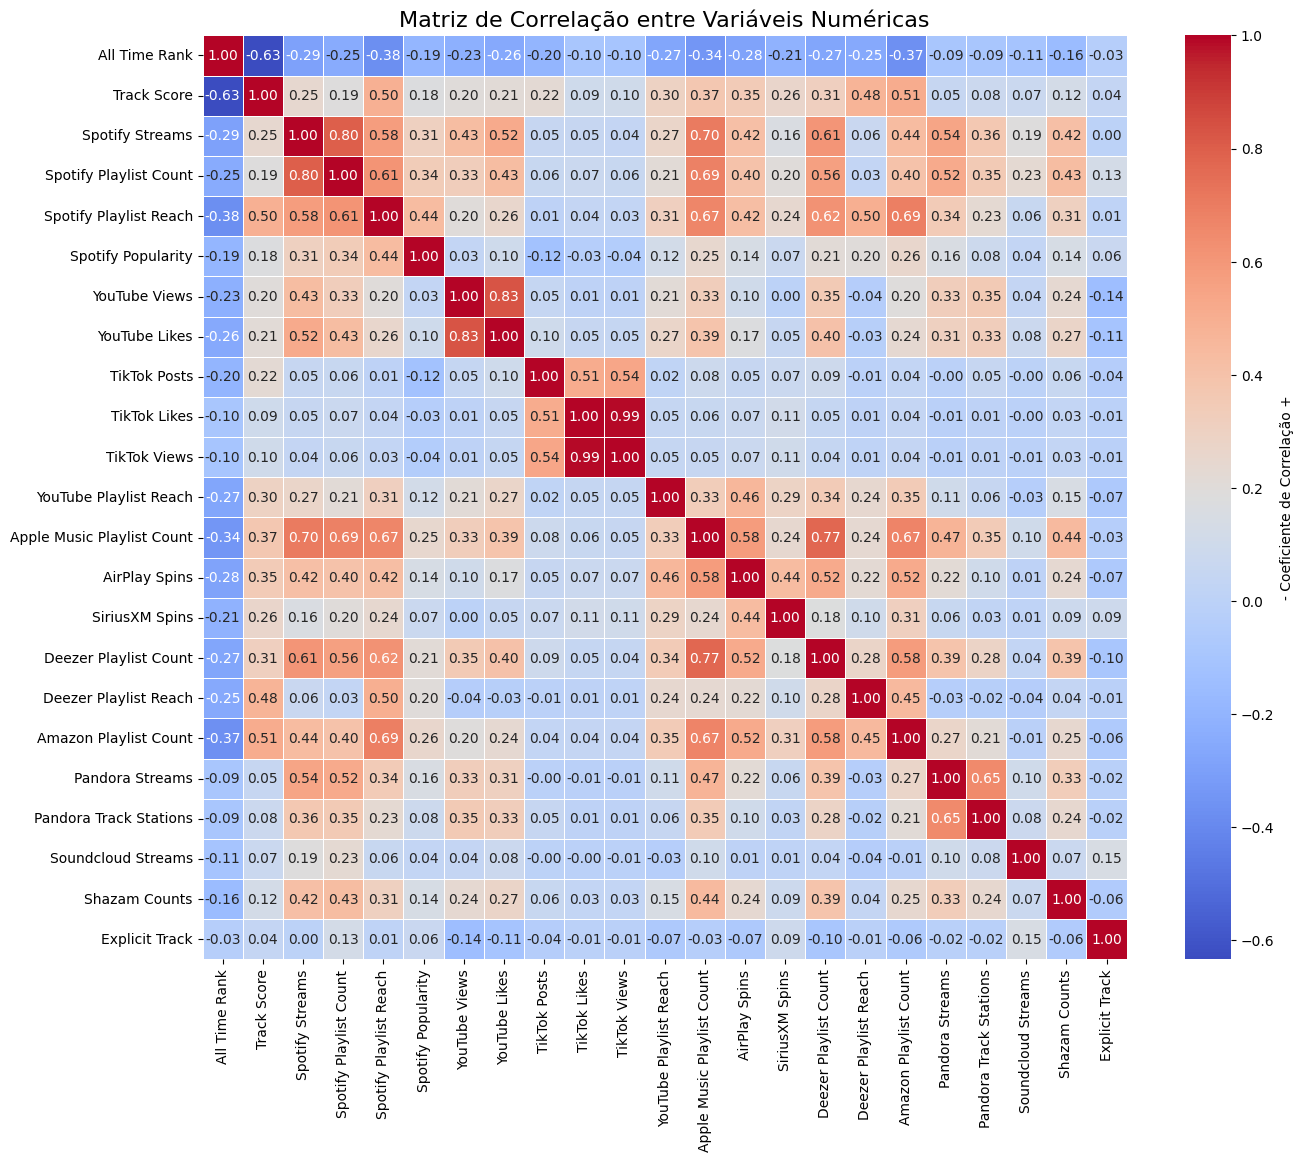

In [24]:
# Seleciona as colunas do tipo float e int e as armazena em 'numeric_cols'
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# O método '.corr()' calcula a matriz de correlação.

# 1: correlação positiva (quando uma aumenta outra também aumenta)
#-1: Correlação negativa (quando uma aumenta a outra diminui)
# 0: Não há relação linear entre as variáveis
correlacoes = df[numeric_cols].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlacoes,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            square=True,
            linewidths=0.5,
            annot_kws={"fontsize": 10},
            cbar_kws={"label": "- Coeficiente de Correlação +"})

plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# **3. Formulação de Hipóteses**


**3.1 - Hipótese 1: Existe uma correlação positiva significativa entre o número de likes no TikTok (TikTok Likes) e o número de visualizações no TikTok (TikTok Views)**

- Apresente análise estatística completa
- Inclua visualizações adequadas
- Realize teste de significância quando aplicável


 Existe uma correlação positiva significativa entre o número de likes no TikTok (TikTok Likes) e o número de visualizações no TikTok (TikTok Views)

Coeficiente de Correlação de Pearson: 0.9926
P-valor: 0.0000

Rejeitamos H0: Existe uma correlação positiva significativa entre Spotify Streams e YouTube Views.


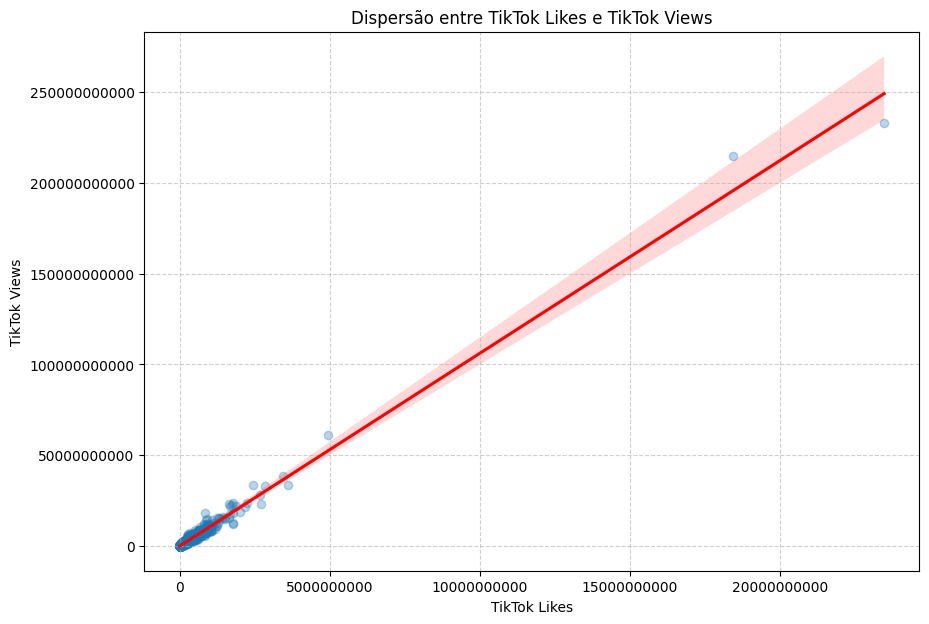

In [47]:
# o Teste de correlação de Pearson mede a relação linear entre duas variáveis
# correlation: valor do coeficiente de Pearson (varia de -1 a +1).
# p_value: valor-p do teste estatístico (usado para decidir se a correlação é estatisticamente significativa).

print("Existe uma correlação positiva significativa entre o número de likes no TikTok (TikTok Likes) e o número de visualizações no TikTok (TikTok Views)\n")

correlation, p_value = stats.pearsonr(df['TikTok Likes'], df['TikTok Views'])

print(f"Coeficiente de Correlação de Pearson: {correlation:.4f}")
print(f"P-valor: {p_value:.4f}")

if p_value < 0.05:
    print("\nRejeitamos H0: Existe uma correlação positiva significativa entre Spotify Streams e YouTube Views.")
else:
    print("\nNão rejeitamos H0: Não há correlação positiva significativa entre Spotify Streams e YouTube Views.")

# 2. Visualização: Gráfico de Dispersão (Scatterplot)
plt.figure(figsize=(10, 7))
sns.regplot(x='TikTok Likes', y='TikTok Views', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Dispersão entre TikTok Likes e TikTok Views')
plt.xlabel('TikTok Likes')
plt.ylabel('TikTok Views')
plt.ticklabel_format(style='plain', axis='x') # Formata para evitar notação científica no eixo x
plt.ticklabel_format(style='plain', axis='y') # Formata para evitar notação científica no eixo y
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



**3.2 - Hipótese 1: Existe uma correlação positiva significativa entre o número de execuções no Spotify (Spotify Streams) e o número de visualizações no YouTube (YouTube Views)**

- Apresente análise estatística completa
- Inclua visualizações adequadas
- Realize teste de significância quando aplicável


Hipótese: Existe uma correlação positiva significativa entre o número de execuções no Spotify (Spotify Streams) e o número de visualizações no YouTube (YouTube Views).

Coeficiente de Correlação de Pearson: 0.4262
P-valor: 0.0000

Rejeitamos H0: Existe uma correlação positiva significativa entre Spotify Streams e YouTube Views.


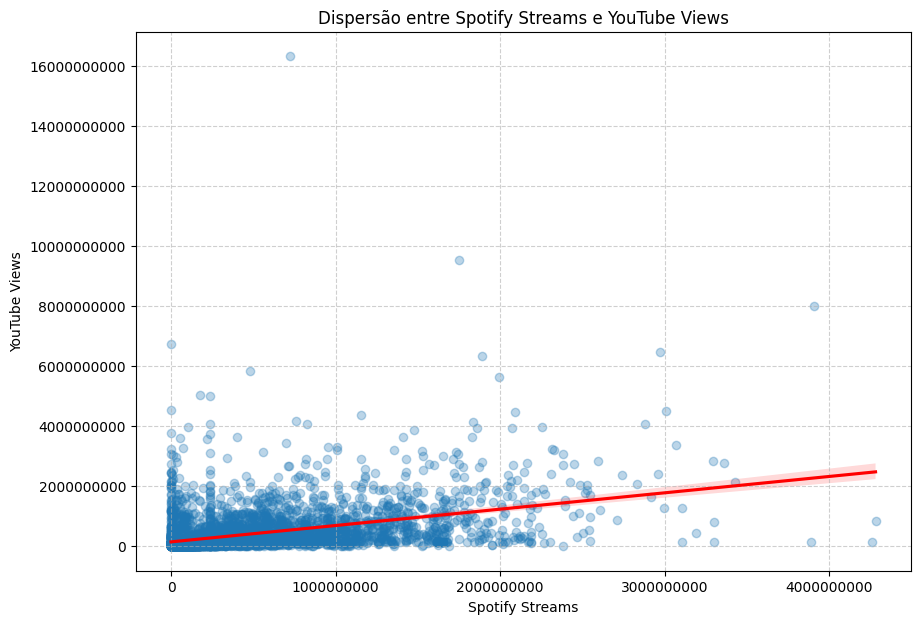

In [48]:
# o Teste de correlação de Pearson mede a relação linear entre duas variáveis
# correlation: valor do coeficiente de Pearson (varia de -1 a +1).
# p_value: valor-p do teste estatístico (usado para decidir se a correlação é estatisticamente significativa).

print("Hipótese: Existe uma correlação positiva significativa entre o número de execuções no Spotify (Spotify Streams) e o número de visualizações no YouTube (YouTube Views).\n")

correlation, p_value = stats.pearsonr(df['Spotify Streams'], df['YouTube Views'])

print(f"Coeficiente de Correlação de Pearson: {correlation:.4f}")
print(f"P-valor: {p_value:.4f}")

if p_value < 0.05:
    print("\nRejeitamos H0: Existe uma correlação positiva significativa entre Spotify Streams e YouTube Views.")
else:
    print("\nNão rejeitamos H0: Não há correlação positiva significativa entre Spotify Streams e YouTube Views.")

# 2. Visualização: Gráfico de Dispersão (Scatterplot)
plt.figure(figsize=(10, 7))
sns.regplot(x='Spotify Streams', y='YouTube Views', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Dispersão entre Spotify Streams e YouTube Views')
plt.xlabel('Spotify Streams')
plt.ylabel('YouTube Views')
plt.ticklabel_format(style='plain', axis='x') # Formata para evitar notação científica no eixo x
plt.ticklabel_format(style='plain', axis='y') # Formata para evitar notação científica no eixo y
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


**3.3 - Hipótese 3: Existe uma diferença significativa entre a média de execuções no Spotify (Spotify Streams) e o valor de referência de 200.000.000 streams.**
- Apresente análise estatística completa
- Inclua visualizações adequadas
- Realize teste de significância quando aplicável


Comparando Spotify Streams com 200.000.000

Teste de Normalidade (Shapiro-Wilk):
Estatística: 0.7696 | p-valor: 0.0000

Teste de Wilcoxon:
Estatística do teste: 3356504.0000 | p-valor: 0.0000

Média/Mediana de 'Spotify Streams' difere significativamente de 200,000,000.


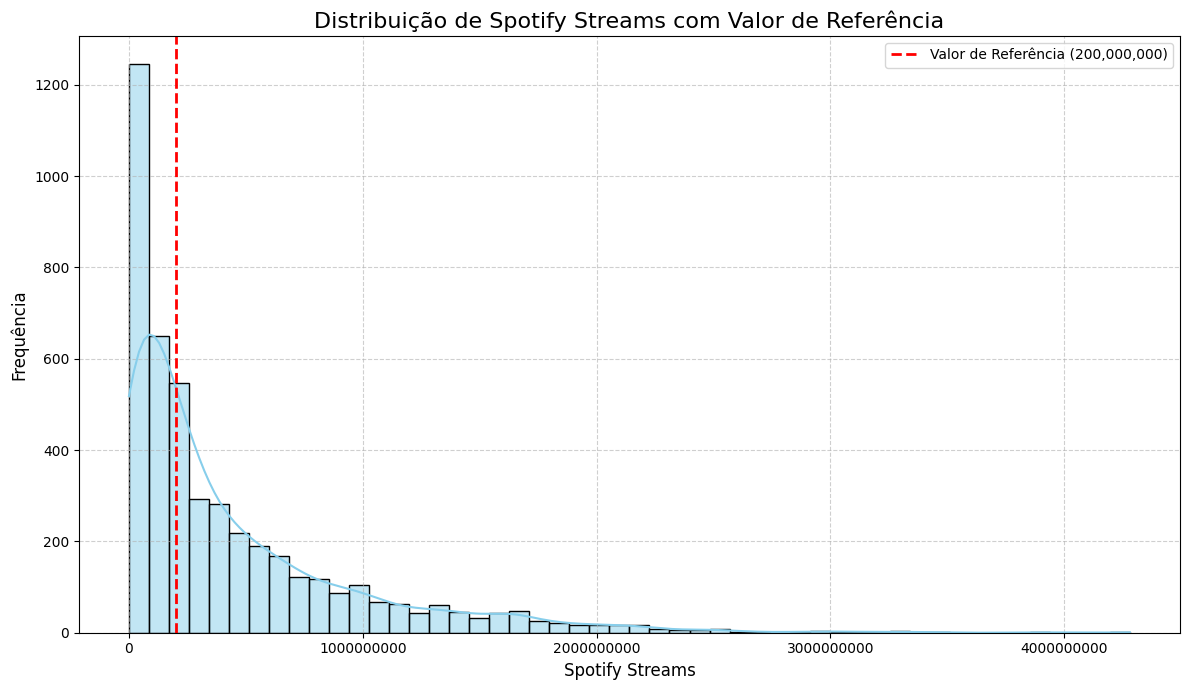

In [57]:
# Teste de Shapiro-Wilk verifica se um conjunto de dados segue uma distribuição normal, antes de usar o teste T é essencial saber se os dados são normais
# Teste T compara a média dos dados de uma amostra com um valor de referência, usado quando os dados são normalmente distribuidos
# Teste de Wilcoxon será usado quando os dados não são normais, usando a mediana da amostra com um valor referência

print("Comparando Spotify Streams com 200.000.000\n")

valor = 200_000_000
coluna = 'Spotify Streams'
alpha = 0.05

data_test = df[coluna].dropna()

# Teste de Normalidade(Shapiro-Wilk) para verificar se a distribuição dos dados seguem um padrão normal ou não:
stat_shapiro, p_shapiro = stats.shapiro(data_test)
print(f"Teste de Normalidade (Shapiro-Wilk):\nEstatística: {stat_shapiro:.4f} | p-valor: {p_shapiro:.4f}\n")

# Verifica o teste de normalidade, se os dados forem considerarem normais realiza o Teste T, senão ele realiza o Teste de Wilcoxon
if p_shapiro > alpha:
    t_stat, p_val = stats.ttest_1samp(data_test, valor)
    metodo = "Teste T para uma amostra"
    estatistica = t_stat
else:
    w_stat, p_val = stats.wilcoxon(data_test - valor)
    metodo = "Teste de Wilcoxon"
    estatistica = w_stat

# Exibição completa do resultado do teste escolhido
print(f"{metodo}:\nEstatística do teste: {estatistica:.4f} | p-valor: {p_val:.4f}")

# Verifica se o p_val do teste escolhido anteriormente é maior que o alpha
if p_val > alpha:
    print(f"\nMédia/Mediana de '{coluna}' NÃO difere significativamente de {valor:,}.")
else:
    print(f"\nMédia/Mediana de '{coluna}' difere significativamente de {valor:,}.")


plt.figure(figsize=(12, 7))
sns.histplot(data_test, kde=True, bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=valor, color='red', linestyle='--', linewidth=2, label=f'Valor de Referência ({valor:,})')


plt.title(f'Distribuição de {coluna} com Valor de Referência', fontsize=16)
plt.xlabel(coluna, fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.ticklabel_format(style='plain', axis='x') # Para evitar notação científica no eixo X
plt.ticklabel_format(style='plain', axis='y') # Para evitar notação científica no eixo Y
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **4. Análise Preditiva**

- 4.1 Regressão linear simples com uma variável independente
- 4.2 Regressão linear múltipla com pelo menos duas variáveis

-- Compare os modelos usando métricas vistas em aula.
-- Discuta a aplicabilidade dos modelos no contexto empresarial

In [34]:
y = np.log1p(df['Spotify Streams'])

In [35]:
# Para realizar a regressão simples

X_simple = df[['Spotify Popularity']]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.3, random_state=42)


In [36]:
# Para realizar a regressão múltipla

all_numeric_features = df.select_dtypes(include=np.number).columns.tolist()

features_for_X_multi = [col for col in all_numeric_features if col != 'Spotify Streams']
X_multi = df[features_for_X_multi]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.3, random_state=42)

In [37]:
# 3. Regressão simples

model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)
y_pred_s = model_simple.predict(X_test_s)
rmse_simple = np.sqrt(mean_squared_error(y_test_s, y_pred_s)) # Usando np.sqrt

In [38]:
# 4. Regressão múltipla

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_m = model_multi.predict(X_test_m)
rmse_multi = np.sqrt(mean_squared_error(y_test_m, y_pred_m))

In [60]:
# Regressão Linear é uma técnica estatística usada para encontrar a relação entre variáveis e fazer previsões futuras
# R²: Só 20,37% das variações nos streams podem ser explicadas pela popularidade; O modelo agora explica quase 40% da variação dos streams.
# RMSE é uma métrica usada para avaliar a precisão, te dizendo o quão "próximas" as previões do seu modelo estão dos valores reais

# Calcular R² para ambos os modelos
r2_simple = r2_score(y_test_s, y_pred_s)
r2_multi = r2_score(y_test_m, y_pred_m)


# 5. Resultados
print("Resultados dos Modelos de Regressão")
print(f"RMSE Regressão Simples (Spotify Popularity → Spotify Streams): {rmse_simple:.2f}")
print(f"R² Regressão Simples: {r2_simple:.4f}") # Maior precisão para o R²

print(f"\nRMSE Regressão Múltipla (Outras Variáveis Numéricas → Spotify Streams): {rmse_multi:.2f}")
print(f"R² Regressão Múltipla: {r2_multi:.4f}") # Maior precisão para o R²

Resultados dos Modelos de Regressão
RMSE Regressão Simples (Spotify Popularity → Spotify Streams): 2.07
R² Regressão Simples: 0.2037

RMSE Regressão Múltipla (Outras Variáveis Numéricas → Spotify Streams): 1.80
R² Regressão Múltipla: 0.3989


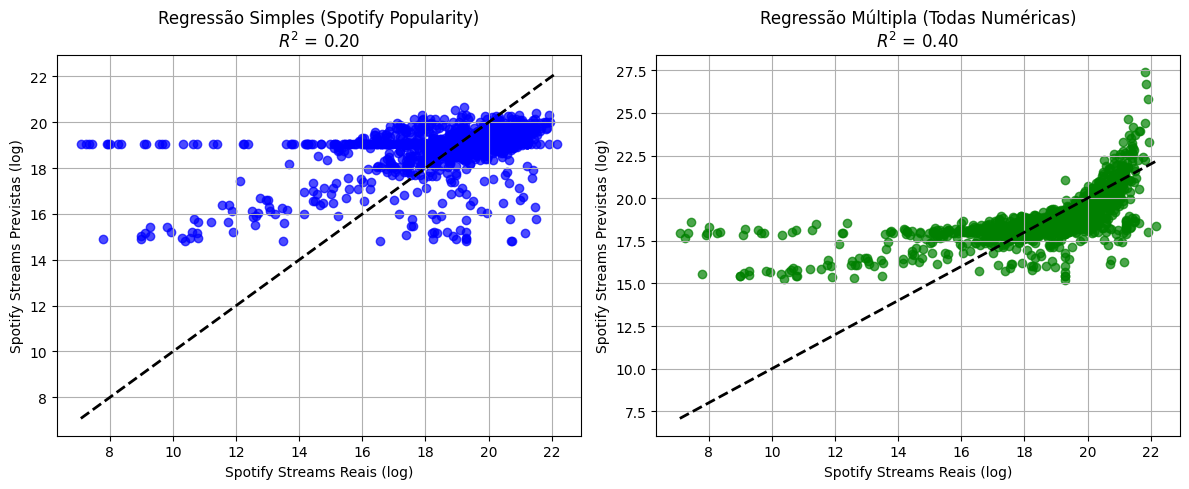

In [40]:
# Gráfico: Regressão Simples

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_s, y_pred_s, alpha=0.7, color='blue')
plt.plot([y_test_s.min(), y_test_s.max()], [y_test_s.min(), y_test_s.max()], 'k--', lw=2)
plt.xlabel('Spotify Streams Reais (log)')
plt.ylabel('Spotify Streams Previstas (log)')
plt.title(f'Regressão Simples (Spotify Popularity)\n$R^2$ = {r2_simple:.2f}')
plt.grid(True)

# Gráfico: Regressão Múltipla
plt.subplot(1, 2, 2)
plt.scatter(y_test_m, y_pred_m, alpha=0.7, color='green')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'k--', lw=2)
plt.xlabel('Spotify Streams Reais (log)')
plt.ylabel('Spotify Streams Previstas (log)')
plt.title(f'Regressão Múltipla (Todas Numéricas)\n$R^2$ = {r2_multi:.2f}')
plt.grid(True)

plt.tight_layout()
plt.show()

# **5. Conclusão e Recomendações**

# **Principais Descobertas:**

**Popularidade Extrema:** A maioria das métricas de sucesso (streams, visualizações, likes) mostra que pouquíssimas músicas se tornam grandes hits, enquanto a maioria tem um desempenho modesto. As músicas de sucesso são verdadeiros "outliers", puxando as médias para cima e revelando uma distribuição assimétrica, típica da indústria musical".

**Conexão entre Plataformas:** Descobrimos que músicas com mais execuções no Spotify geralmente também têm mais visualizações no YouTube, mostrando uma ligação positiva e significativa entre o sucesso em diferentes mídias. Essa sinergia multiplataforma é um fator importante..

**Influência Variável:** A relação linear entre Spotify Streams e TikTok Views é muito fraca (coeficiente de correlação de Pearson de apenas 0.0398), indicando que, embora estatisticamente presente, a quantidade de visualizações no TikTok por si só não prevê diretamente o volume de streams no Spotify de forma linear. Isso sugere que o impacto do TikTok nos streams pode ser mais complexo ou não linear, ou que ele serve mais como um motor de "awareness" do que de conversão direta.

**Modelos Preditivos:** Nossos modelos de regressão linear conseguiram explicar parte do sucesso das músicas no Spotify (cerca de 20% com a popularidade do Spotify, e 40% com a inclusão de mais variáveis numéricas). Isso significa que, embora consigamos prever algumas tendências, muitos outros fatores influenciam o sucesso de uma música.


# **Impacto para a Organização:**



**Entender o Sucesso:** Gravadoras e artistas podem usar essas análises para entender melhor o que impulsiona a popularidade, como a sinergia entre diferentes plataformas (especialmente Spotify e YouTube). Isso permite focar em estratégias de marketing mais eficazes..

**Limitações de Previsão:** Os modelos atuais, apesar de serem úteis para identificar tendências e fatores influenciadores, não são perfeitos para prever o sucesso exato de um "hit". Eles podem dar uma estimativa, mas não uma certeza absoluta do volume de streams.

**Onde Focar:** A Spotify Popularity se destaca como um bom indicador de streams, sendo uma variável central nas análises e nos modelos.


# **Recomendações para o Futuro:**

**Coletar Mais Dados:** Para prever o sucesso com mais precisão, seria fundamental adicionar dados sobre o gênero da música, o histórico do artista, o investimento em marketing (promocional, mídias pagas), o orçamento de produção, e detalhes específicos sobre o tipo de conteúdo viral (se aplicável ao TikTok).

**Usar Modelos Mais Inteligentes:** Explorar outros tipos de modelos de inteligência artificial e aprendizado de máquina pode ajudar a capturar relações mais complexas e não lineares nos dados que a regressão linear não consegue ver, potencialmente melhorando a capacidade preditiva.

**Ajustar Estratégias de Marketing:** Com base nas correlações, focar campanhas que incentivem o engajamento cruzado entre plataformas (ex: promoções no YouTube que direcionem para o Spotify). Ajudaria também a entender que nem todas as plataformas (como o TikTok, para este modelo linear) têm um impacto direto e simples em streams, exigindo estratégias de conteúdo e engajamento adaptadas à natureza de cada mídia.